<a href="https://colab.research.google.com/github/shreyasnagooor/Agentic-Cardiovascular-Risk-Stratification-and-Predictive-Modeling-using-Ensemble-Techniques/blob/main/HeartPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('/content/heart (1).csv')
print('Shape of the data is ', data.shape)

Shape of the data is  (303, 14)


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(data)} instead of 303!')

The length of the data now is 296 instead of 303!


Rename Columns



In [ ]:
data = data.rename(
    columns = {'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'},
    errors="raise")

Feature Engineering

In [ ]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 0] = 'normal'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [ ]:
data.dtypes

,0
age,int64
sex,object
chest_pain_type,object
resting_blood_pressure,int64
cholesterol,int64
fasting_blood_sugar,object
resting_electrocardiogram,object
max_heart_rate_achieved,int64
exercise_induced_angina,object
st_depression,float64


In [ ]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


In [ ]:

num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

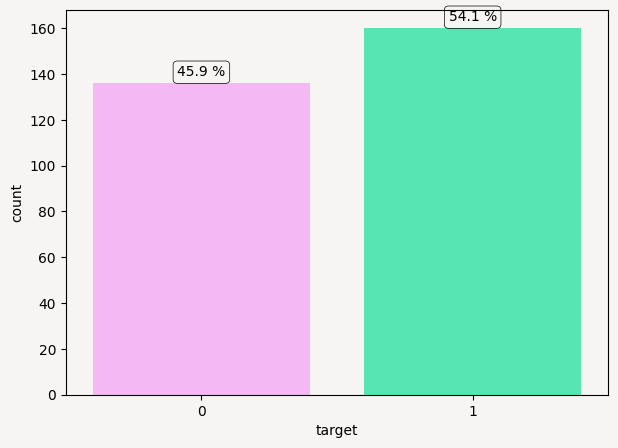

In [ ]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))


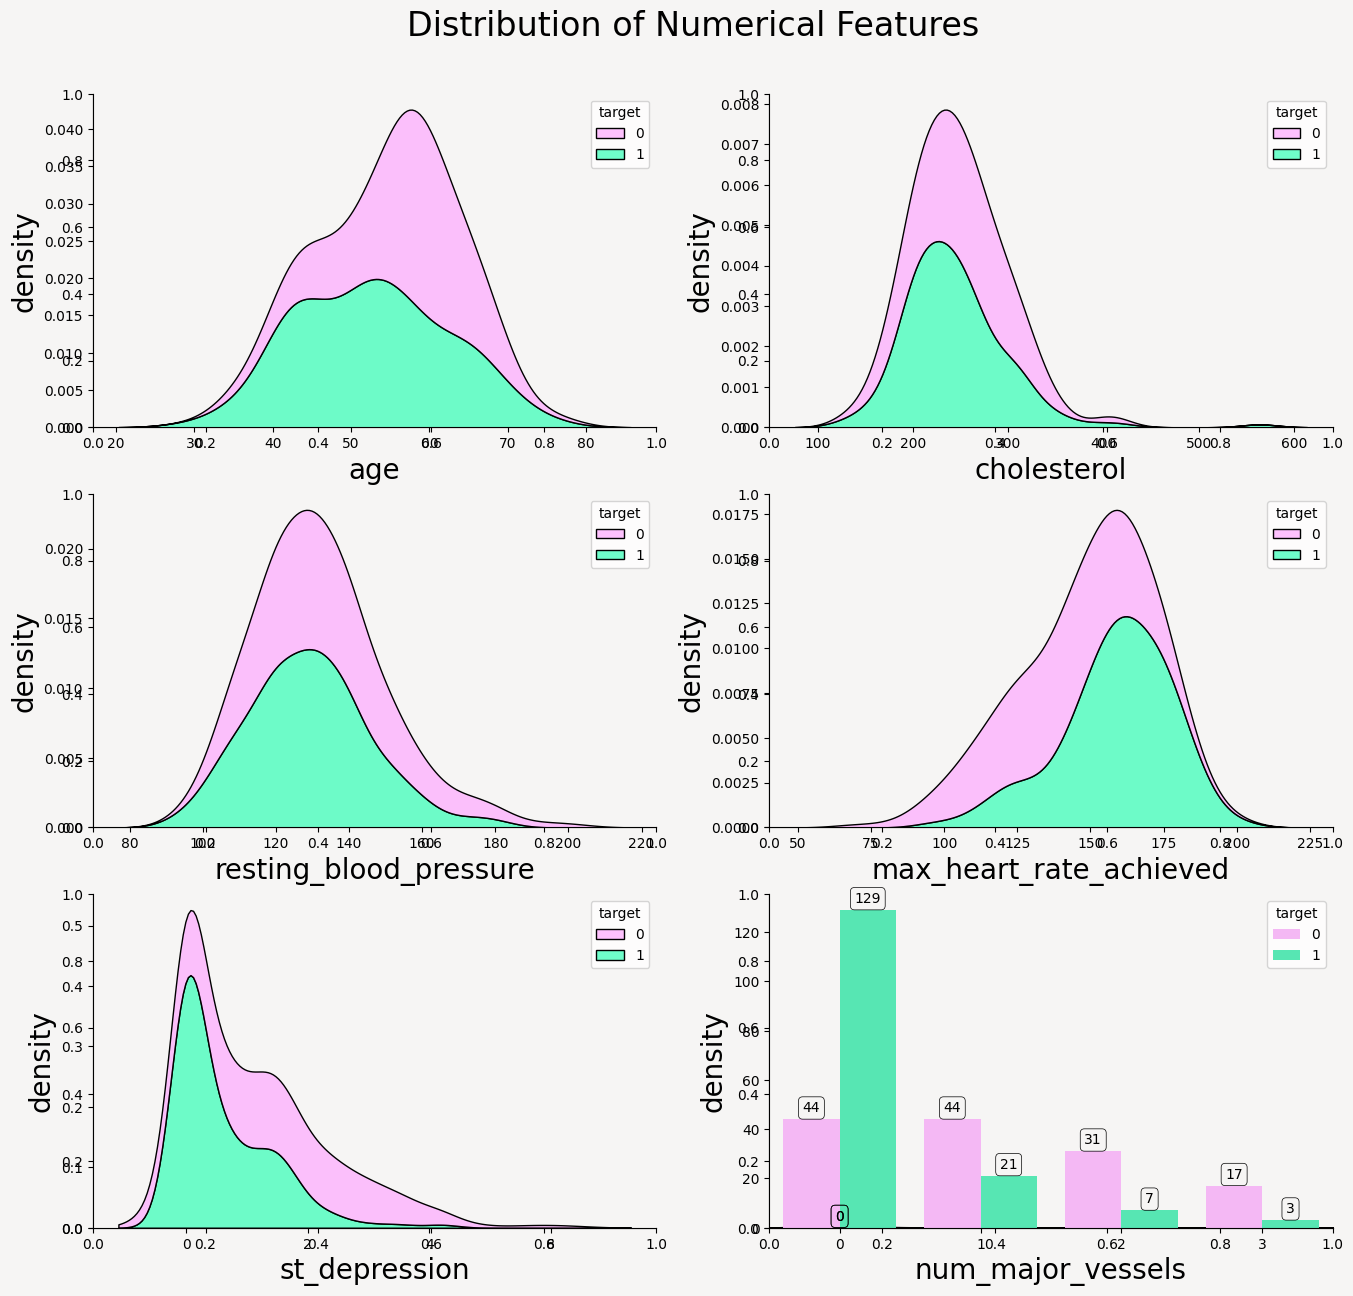

In [ ]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')

    ax = sns.kdeplot(data=data, x=col, hue="target", multiple="stack", palette=mypal[1::4])
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24);

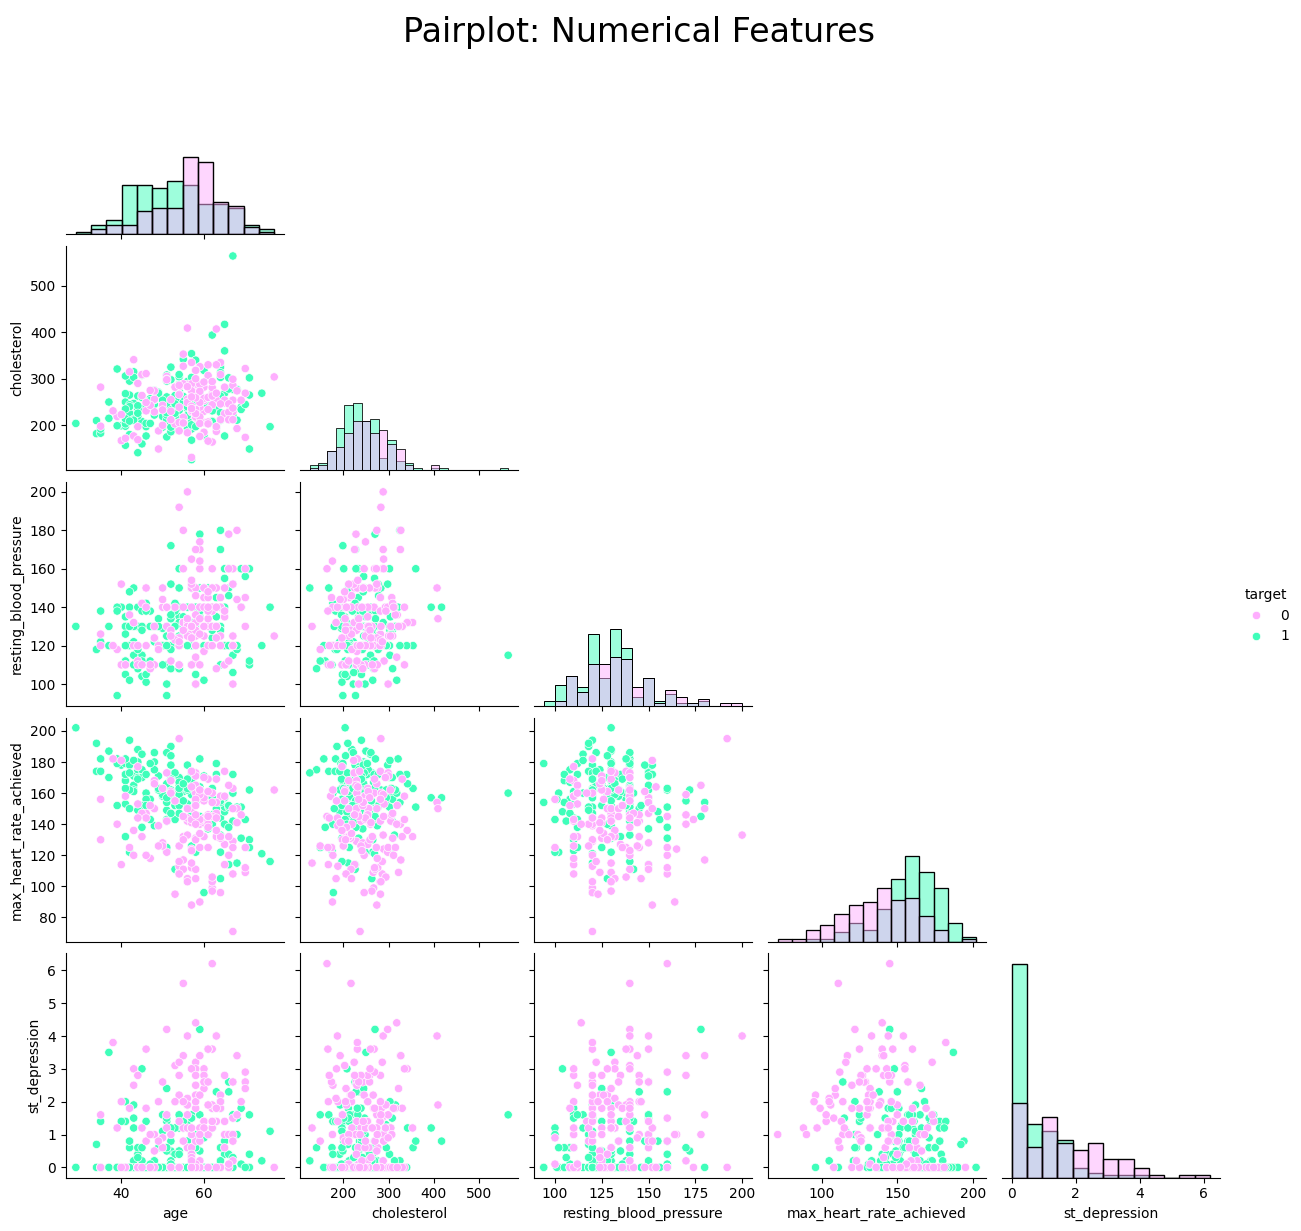

In [ ]:
_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_ = data[_]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

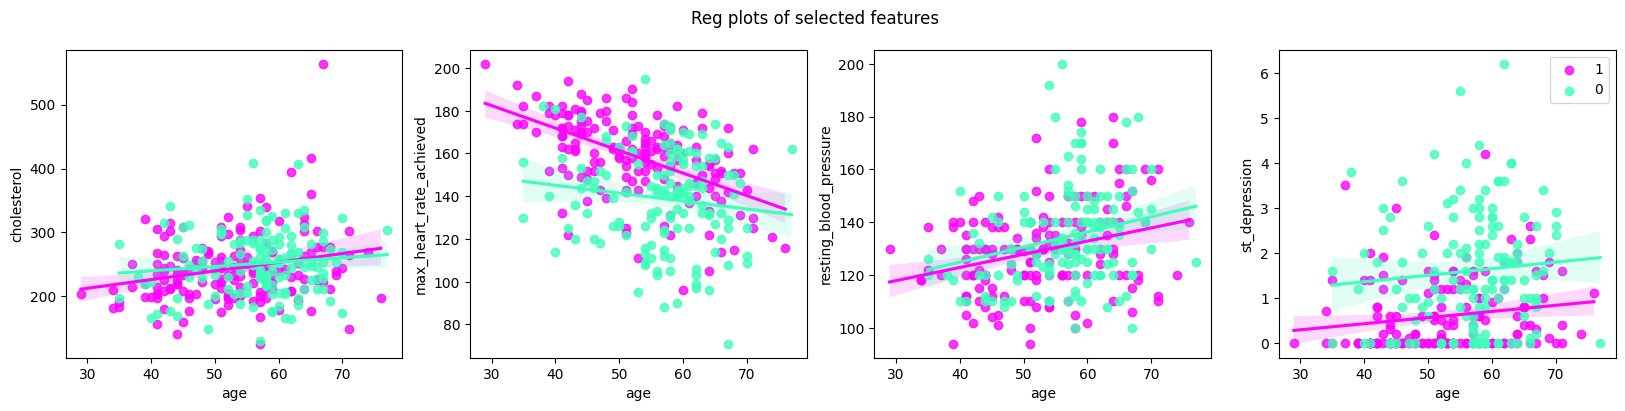

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=data[data['target'] ==1], x='age', y='cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

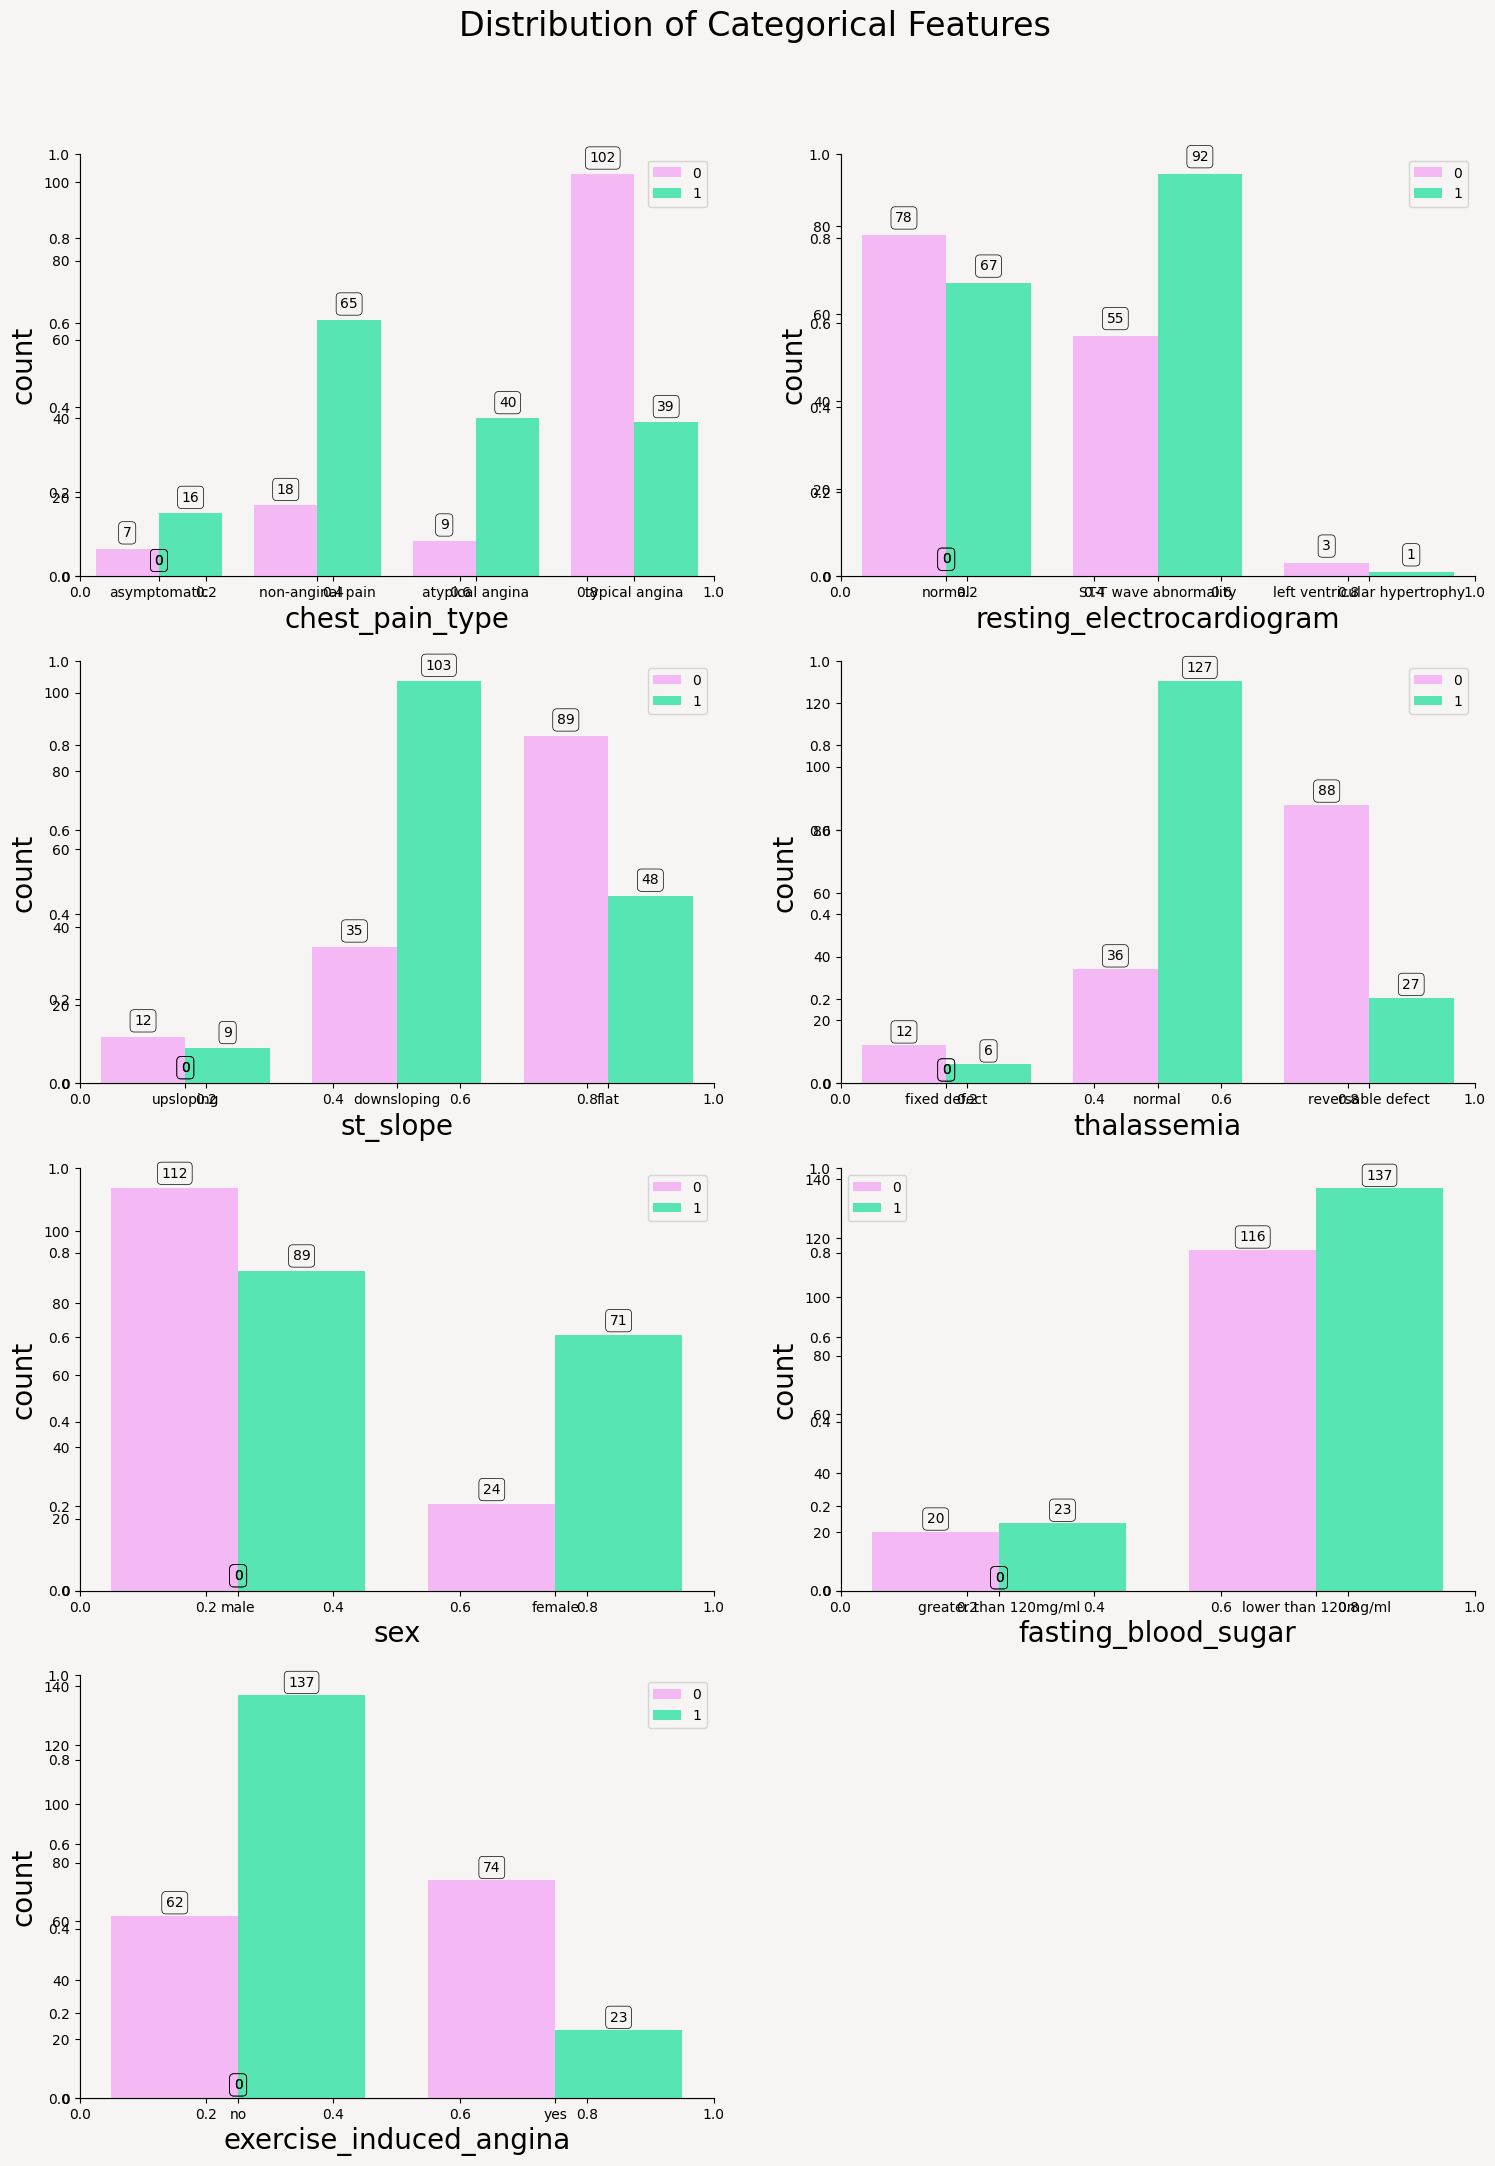

In [ ]:
def count_plot(data, cat_feats):
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False)
        plt.legend(facecolor='#F6F5F4')

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(data, cat_feats[0:-1]);

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data_encoded = pd.get_dummies(data, drop_first=True)
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = logistic_model.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 83.15%

Confusion Matrix:
 [[34  7]
 [ 8 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.85      0.83      0.84        48

    accuracy                           0.83        89
   macro avg       0.83      0.83      0.83        89
weighted avg       0.83      0.83      0.83        89



In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logistic_model, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


Cross-Validation Accuracy Scores: [0.83333333 0.89830508 0.83050847 0.83050847 0.77966102]
Mean CV Accuracy: 83.45%


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy (Tuned Model): {:.2f}%".format(accuracy_score(y_test, y_pred_best) * 100))


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy (Tuned Model): 83.15%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Model Evaluation")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))




Random Forest Model Evaluation
Accuracy: 82.02%

Confusion Matrix:
 [[33  8]
 [ 8 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.83      0.83      0.83        48

    accuracy                           0.82        89
   macro avg       0.82      0.82      0.82        89
weighted avg       0.82      0.82      0.82        89



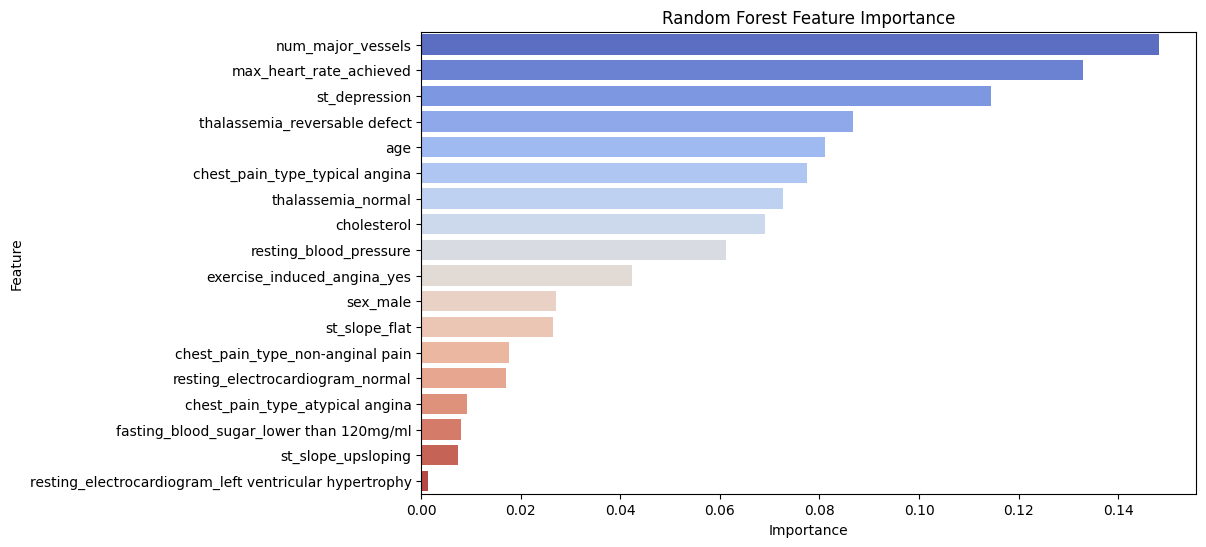

In [ ]:
# Extract feature importance from Random Forest
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importance, x='Importance', y='Feature', palette='coolwarm')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 82.02%

Confusion Matrix:
 [[33  8]
 [ 8 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.83      0.83      0.83        48

    accuracy                           0.82        89
   macro avg       0.82      0.82      0.82        89
weighted avg       0.82      0.82      0.82        89



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_dt) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 74.16%

Confusion Matrix:
 [[33  8]
 [15 33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74        41
           1       0.80      0.69      0.74        48

    accuracy                           0.74        89
   macro avg       0.75      0.75      0.74        89
weighted avg       0.75      0.74      0.74        89



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
ann_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5615 - loss: 0.6959 - val_accuracy: 0.5393 - val_loss: 0.6765
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6076 - loss: 0.6356 - val_accuracy: 0.6517 - val_loss: 0.6351
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6217 - loss: 0.6261 - val_accuracy: 0.7303 - val_loss: 0.6013
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7452 - loss: 0.5632 - val_accuracy: 0.7753 - val_loss: 0.5711
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8065 - loss: 0.5088 - val_accuracy: 0.7865 - val_loss: 0.5444
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8014 - loss: 0.5040 - val_accuracy: 0.8090 - val_loss: 0.5206
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8251 - loss: 0.4831 - val_accuracy: 0.8202 - val_loss: 0.4961
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8735 - loss: 0.4383 - val_accuracy: 0.8202 - val_loss: 0.4728
Epoch 

In [ ]:
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test)
print("ANN Accuracy: {:.2f}%".format(ann_accuracy * 100))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8354 - loss: 0.3861 
ANN Accuracy: 84.27%


In [ ]:
pip install xgboost


XGBoost Model Accuracy: 83.15%

Confusion Matrix:
 [[34  7]
 [ 8 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.85      0.83      0.84        48

    accuracy                           0.83        89
   macro avg       0.83      0.83      0.83        89
weighted avg       0.83      0.83      0.83        89

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Tuned XGBoost Model Accuracy: 83.15%


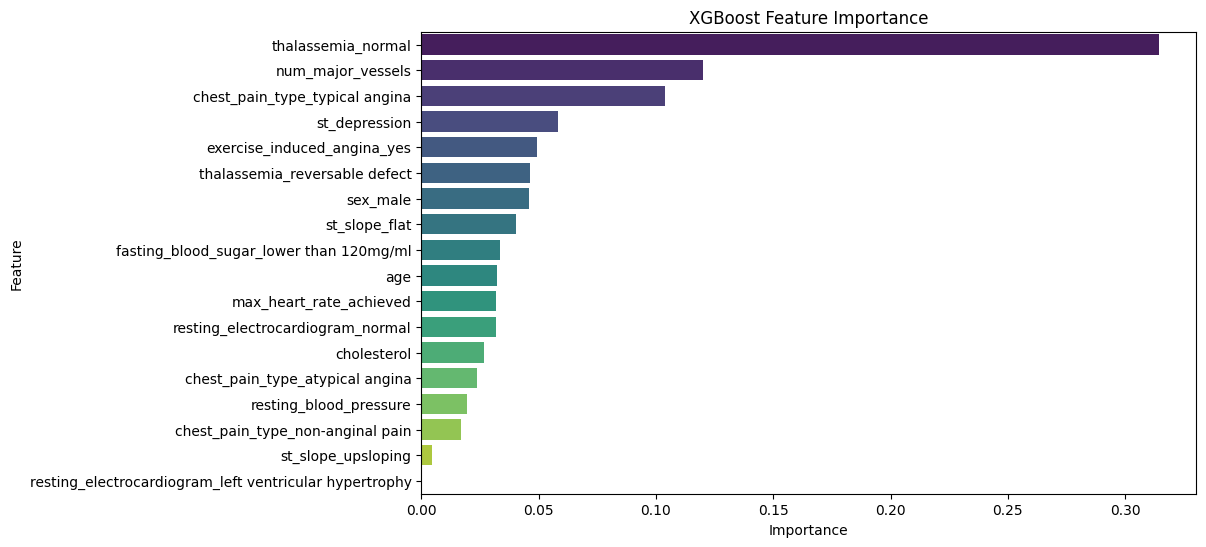

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Model Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_xgb) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    verbose=1
)

grid_search_xgb.fit(X_train, y_train)
print("Best Hyperparameters for XGBoost:", grid_search_xgb.best_params_)
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)
print("Tuned XGBoost Model Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_best_xgb) * 100))
importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_xgb, x='Importance', y='Feature', palette='viridis')
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
accuracy_results = {
    'Logistic Regression': accuracy_score(y_test, y_pred_best) * 100,
    'Random Forest': accuracy_score(y_test, y_pred_rf) * 100,
    'Decision Tree': accuracy_score(y_test, y_pred_dt) * 100,
    'ANN': ann_accuracy * 100,
    'XGBoost': accuracy_score(y_test, y_pred_xgb) * 100
}

print("\nComparative Accuracy Results:")
for model, accuracy in accuracy_results.items():
    print(f"{model}: {accuracy:.2f}%")



Comparative Accuracy Results:
Logistic Regression: 83.15%
Random Forest: 82.02%
Decision Tree: 74.16%
ANN: 84.27%
XGBoost: 83.15%


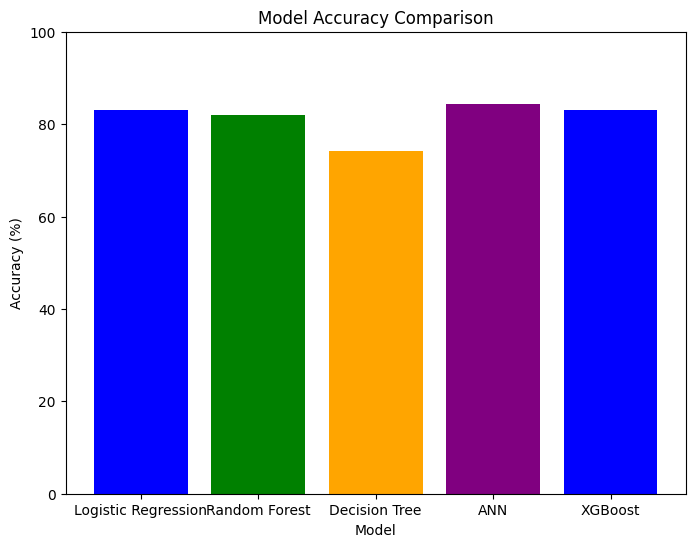

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'orange', 'purple'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.show()


AI AGENT

In [ ]:
import joblib
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
joblib.dump(scaler, "scaler.pkl")
ann_model.save("heart_disease_ann.h5")
original_columns = X.columns
joblib.dump(original_columns, "model_columns.pkl")

print("Scaler, ANN model, and model columns have been saved successfully.")
def predict_heart_disease(patient_data):
    """
    Predict heart disease risk for a new patient.
    patient_data: dict containing raw feature values, e.g.:
    {
      'age': 50,
      'sex': 'male',
      'chest_pain_type': 'atypical angina',
      'resting_blood_pressure': 130,
      'cholesterol': 250,
      'fasting_blood_sugar': 'lower than 120mg/ml',
      'resting_electrocardiogram': 'normal',
      'max_heart_rate_achieved': 140,
      'exercise_induced_angina': 'no',
      'st_depression': 1.2,
      'st_slope': 'flat',
      'num_major_vessels': 1,
      'thalassemia': 'normal'
    }
    (All these keys must match the original feature names before get_dummies.)
    """
    scaler_loaded = joblib.load("scaler.pkl")
    model_columns = joblib.load("model_columns.pkl")
    model = load_model("heart_disease_ann.h5")
    patient_df = pd.DataFrame([patient_data])

    patient_encoded = pd.get_dummies(patient_df, drop_first=True)
    for col in model_columns:
        if col not in patient_encoded.columns:
            patient_encoded[col] = 0
    patient_encoded = patient_encoded[model_columns]


    patient_scaled = scaler_loaded.transform(patient_encoded)

    prediction = model.predict(patient_scaled)

    risk = "High" if prediction[0][0] > 0.3 else "Low"
    return risk

new_patient_data = {
    'age': 50,
    'sex': 'male',
    'chest_pain_type': 'atypical angina',
    'resting_blood_pressure': 130,
    'cholesterol': 250,
    'fasting_blood_sugar': 'lower than 120mg/ml',
    'resting_electrocardiogram': 'normal',
    'max_heart_rate_achieved': 140,
    'exercise_induced_angina': 'no',
    'st_depression': 1.2,
    'st_slope': 'flat',
    'num_major_vessels': 1,
    'thalassemia': 'normal'
}

risk_prediction = predict_heart_disease(new_patient_data)
print(f"Heart disease risk for the given patient: {risk_prediction}")


Scaler, ANN model, and model columns have been saved successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Heart disease risk for the given patient: High
